In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# random walk
def random_walk(positions, mean=0, std=1, num_iter=20000):
    population, dimention = positions.shape
    memo = []
    for _ in xrange(num_iter):
        # add to memory
        memo.append(np.mean(positions, 0))
        # chose a random dir to step forward
        step = np.random.normal(
            loc=mean, scale=std,
            size=(population, dimention)
        ).reshape(population, dimention)
        # update
        positions += step
    # the last update
    memo.append(np.mean(positions, 0))
    return np.array(memo)

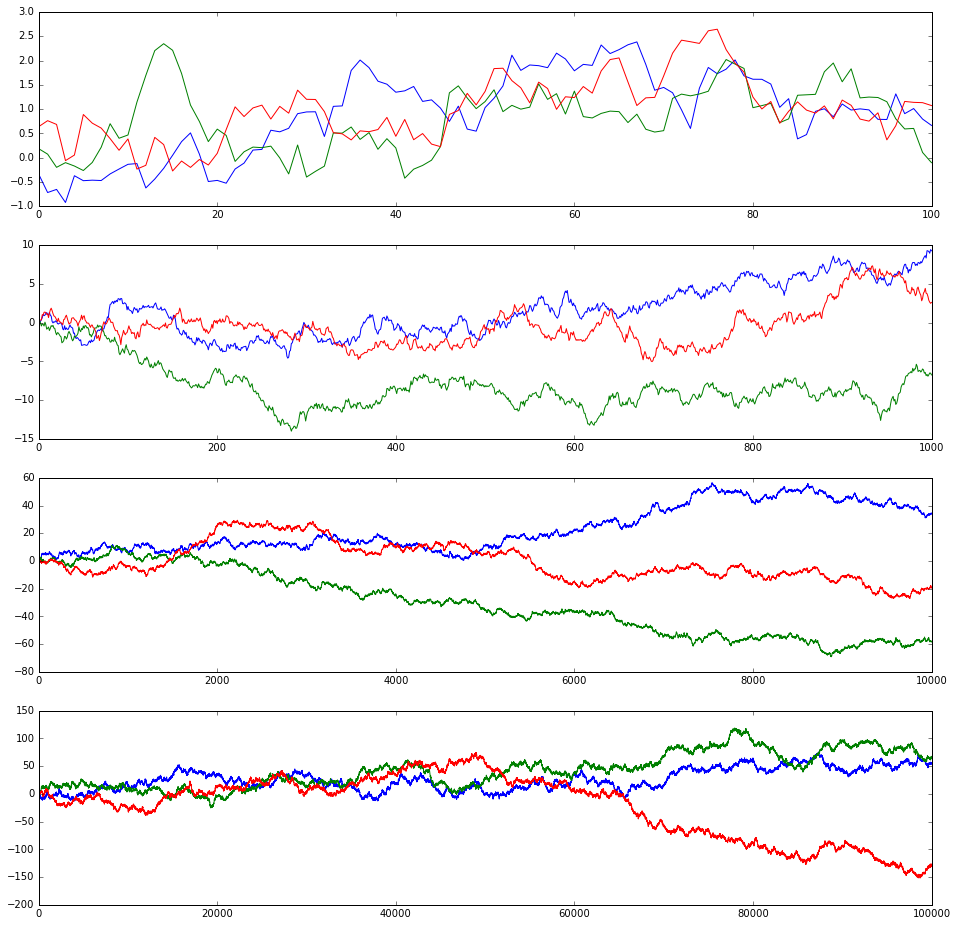

In [3]:
# Parameters
population = 10
mean = 0
std = 1

iterations = [100, 1000, 10000, 100000]
plt.figure(figsize=(16, 16))

for i, num_iter in enumerate(iterations):
    # initialize
    bacteria_pos = np.random.normal(loc=mean, scale=std, size=(population, 3)).reshape(population, 3)
    memo = random_walk(bacteria_pos, mean, std, num_iter)
    plt.subplot(4, 1, i+1)
    plt.plot(memo)

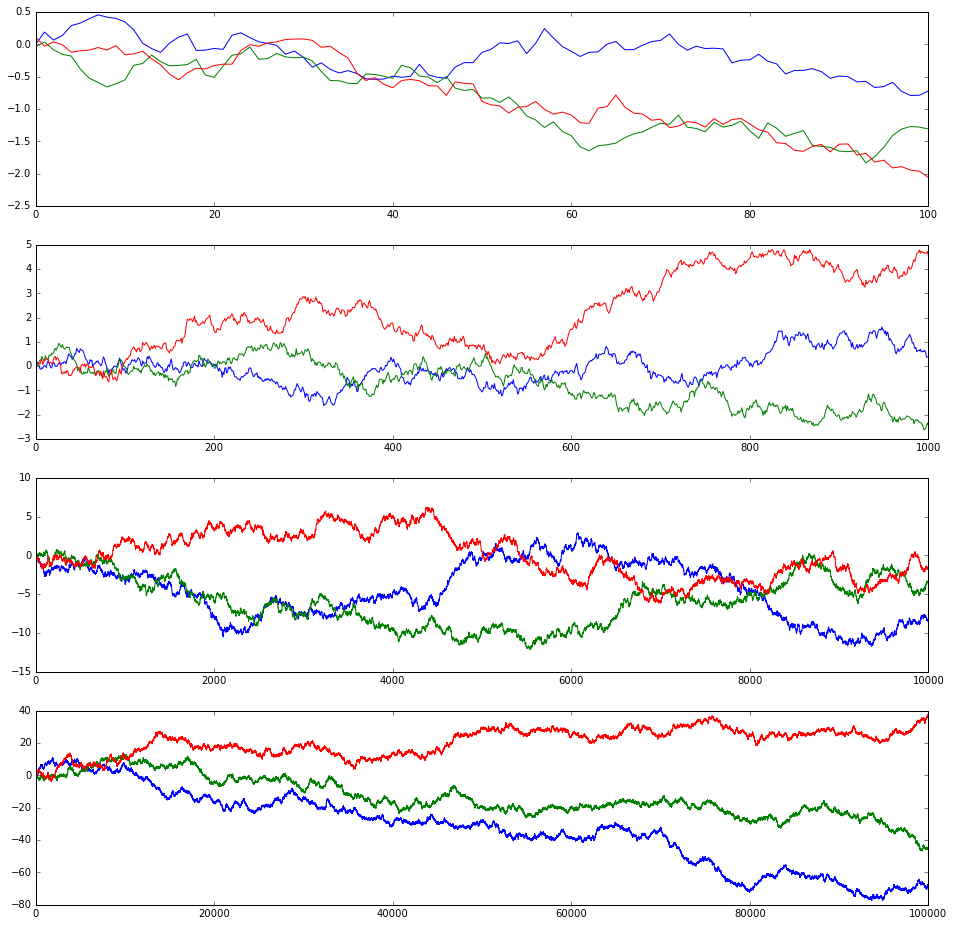

In [4]:
# Parameters
population = 100
mean = 0
std = 1

iterations = [100, 1000, 10000, 100000]
plt.figure(figsize=(16, 16))

for i, num_iter in enumerate(iterations):
    # initialize
    bacteria_pos = np.random.normal(loc=mean, scale=std, size=(population, 3)).reshape(population, 3)
    memo = random_walk(bacteria_pos, mean, std, num_iter)
    plt.subplot(4, 1, i+1)
    plt.plot(memo)

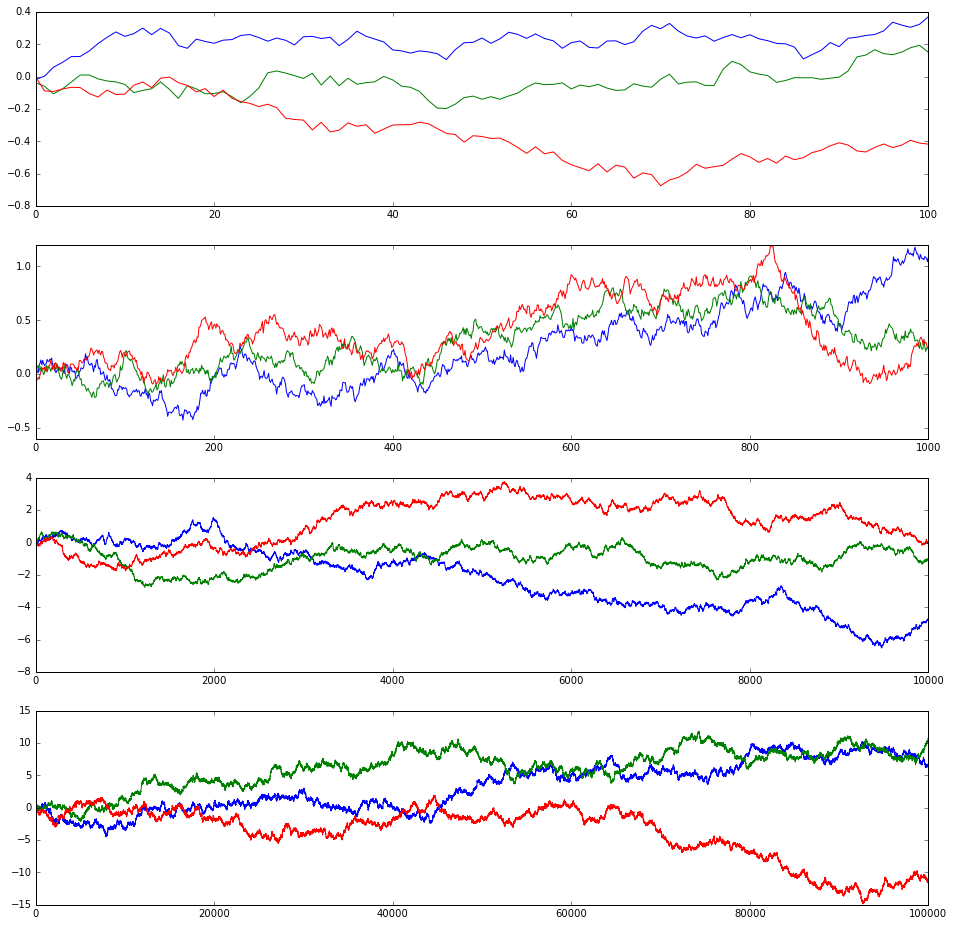

In [5]:
# Parameters
population = 1000
mean = 0
std = 1

iterations = [100, 1000, 10000, 100000]
plt.figure(figsize=(16, 16))

for i, num_iter in enumerate(iterations):
    # initialize
    bacteria_pos = np.random.normal(loc=mean, scale=std, size=(population, 3)).reshape(population, 3)
    memo = random_walk(bacteria_pos, mean, std, num_iter)
    plt.subplot(4, 1, i+1)
    plt.plot(memo)